<!-- COVID-19 Global Data Tracker -->

# COVID-19 Global Data Tracker

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

<!-- COVID-19 Global Data Tracker -->

In [18]:
# Load dataset
df = pd.read_csv("owid-covid-data.csv")

In [19]:
# Explore dataset
print(df.columns)
print(df.head())
print(df.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [20]:
# Data cleaning
# Convert date column
df["date"] = pd.to_datetime(df["date"])

In [21]:
# Filter countries of interest
countries = ["Kenya", "India", "United States"]
df = df[df["location"].isin(countries)]

In [22]:
# Drop rows with missing critical values
df = df.dropna(subset=["date", "total_cases"])

In [23]:
# Fill or interpolate missing values
df = df.fillna(method="ffill") # ffill means forward fill

C:\Users\HP\AppData\Local\Temp\ipykernel_6080\700522753.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Cases and Deaths over time

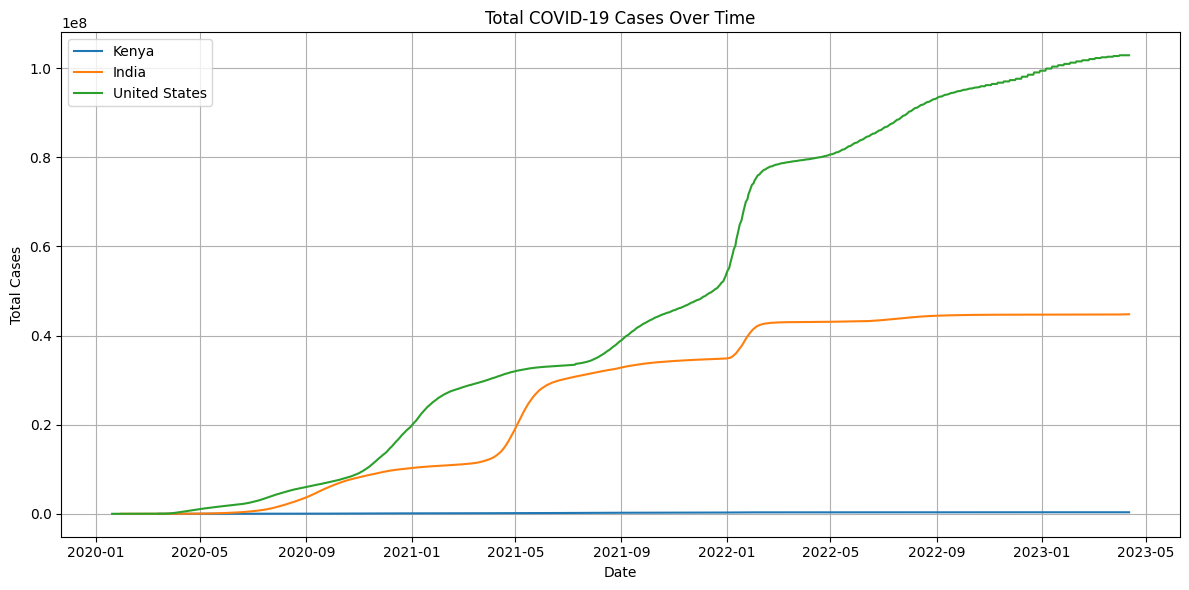

In [24]:
plt.figure(figsize=(12,6))
for country in countries:
  country_data = df[df["location"] == country]
  plt.plot(country_data["date"], country_data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Daily New Cases Comparison

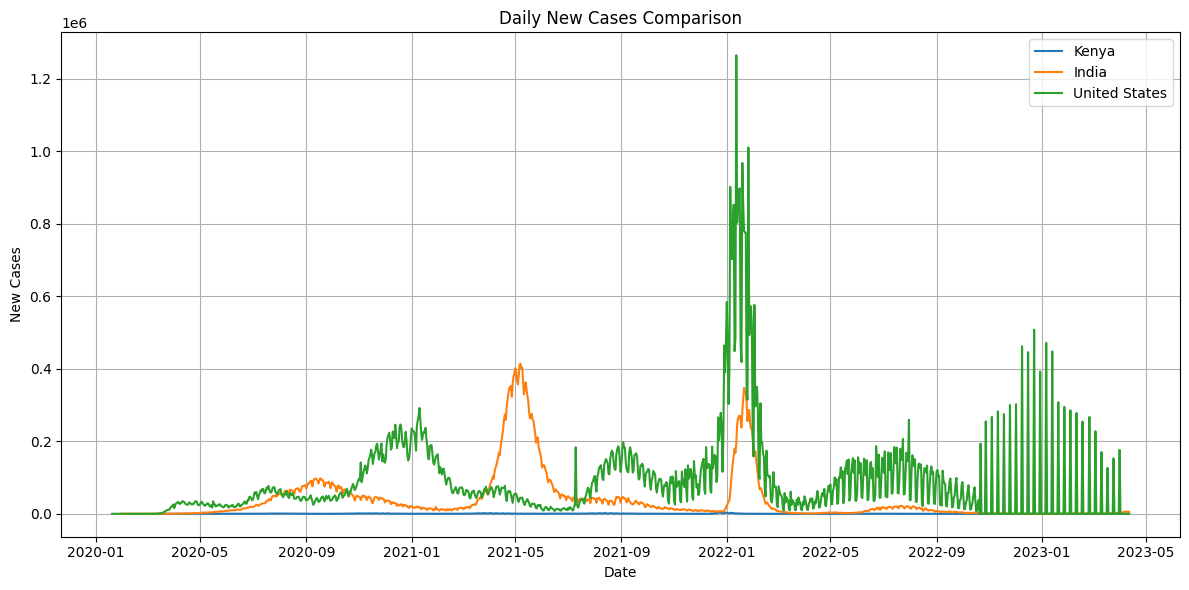

In [25]:
plt.figure(figsize=(12,6))
for country in countries:
  country_data = df[df["location"] == country]
  plt.plot(country_data["date"], country_data["new_cases"], label=country)
plt.title("Daily New Cases Comparison")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# Death Rate Analysis
df["death_rate"] = df["total_deaths"] / df["total_cases"]

Vaccination Progress

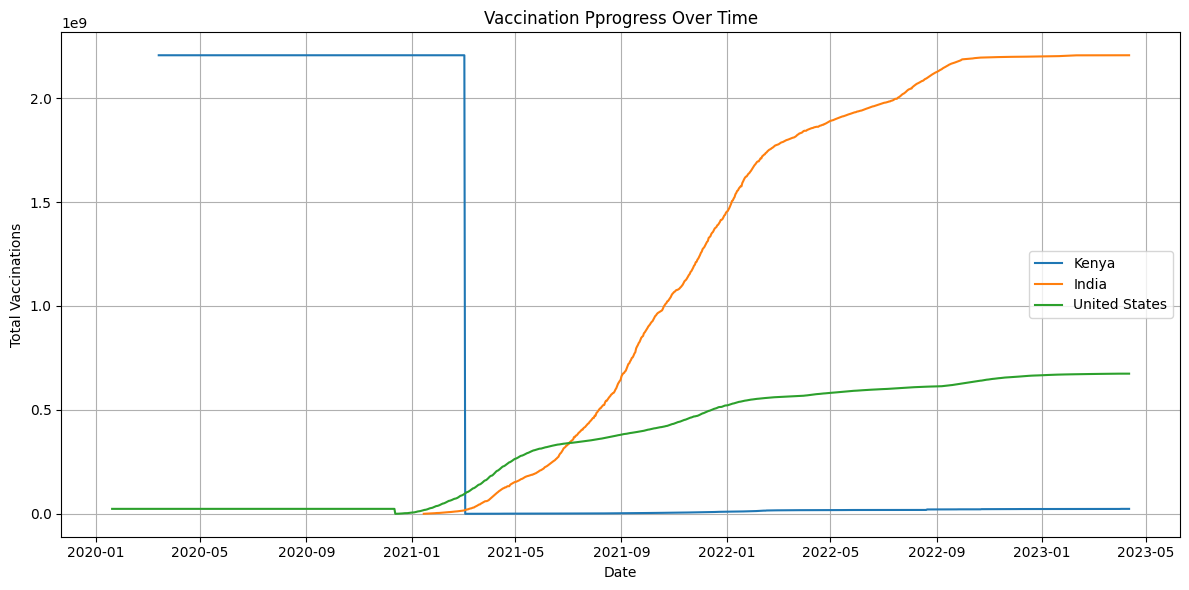

In [27]:
plt.figure(figsize=(12,6))
for country in countries:
  country_data = df[df["location"] == country]
  plt.plot(country_data["date"], country_data["total_vaccinations"], label=country)
plt.title("Vaccination Pprogress Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Choropleth usage

In [28]:
latest_df = df[df["date"] == df["date"].max()]
choropleth_df = latest_df[["iso_code", "location", "total_cases"]].dropna()
fig = px.choropleth(
  data_frame=choropleth_df,
  locations="iso_code",
  color="total_cases",
  hover_name="location",
  color_continuous_scale="Reds",
  title="Global COVID-19 Total Cases (Latest Date)"
)
fig.show()

# 🧾 8. Summary & Insights

## Key Findings

1. **India** experienced a sharp spike in cases during **May 2021**, marking one of the highest surges globally.
2. **United States** leads in total vaccinations, demonstrating an early and widespread rollout.
3. **Kenya** showed a delayed vaccine rollout but achieved rapid progress in subsequent months.
4. **Death rates** vary significantly, which may indicate differences in healthcare infrastructure and reporting.
5. The **choropleth map** highlights geographic case density, with several hotspots in North America, South Asia, and Europe.

## Conclusion

This analysis shows clear disparities in COVID-19 impact and response across countries. Vaccination efforts correlate with reduced death rates and case surges in some regions. Continuous data tracking and global cooperation remain vital.